In [33]:
import pandas as pd
from datetime import datetime
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [34]:
df_reviews = pd.read_csv('C:/Users/13870/Desktop/820/reviews.csv')
#df_reviews = pd.read_csv('https://raw.githubusercontent.com/jinke7678/BA820_Project_Team11/main/data/reviews.csv?token=GHSAT0AAAAAACNB4JNVP3FV7OT3TK5A7DYCZO4VIBQ')
df_reviews.drop(['id','reviewer_name'], axis=1, inplace=True)
df_reviews.rename(columns={'date': 'review_date'}, inplace=True)
df_reviews

,listing_id,review_date,reviewer_id,comments
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Great value for the money! This location has e...
...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...


In [35]:
df_list= pd.read_csv('C:/Users/13870/Desktop/820/listings.csv')
#df_list= pd.read_csv('https://raw.githubusercontent.com/jinke7678/BA820_Project_Team11/main/data/listings.csv?token=GHSAT0AAAAAACNB4JNUVOAGJOGUTI7RB6REZO4VI5A')

In [36]:
columns_to_keep= [
    'id','neighbourhood_cleansed','price', 'latitude', 'longitude', 
    'room_type', 'number_of_reviews','review_scores_rating']
df_list1= df_list[columns_to_keep]
df_list1 = df_list1.drop_duplicates()
df_list1.rename(columns={'id': 'listing_id'}, inplace=True)
df_list1

,listing_id,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,5506,Roxbury,$135.00,42.328440,-71.095810,Entire home/apt,122,4.79
2,6695,Roxbury,$179.00,42.328020,-71.093870,Entire home/apt,127,4.81
3,8789,Beacon Hill,$91.00,42.358670,-71.063070,Entire home/apt,27,4.67
4,10813,Back Bay,$86.00,42.350610,-71.087870,Entire home/apt,5,5.00
...,...,...,...,...,...,...,...,...
4199,1046563598019556549,Dorchester,$83.00,42.285236,-71.069907,Entire home/apt,1,5.00
4200,1046568292864752336,Downtown,$107.00,42.352970,-71.063690,Entire home/apt,0,NaN
4201,1047166785349446101,Fenway,$136.00,42.347480,-71.090780,Entire home/apt,0,NaN
4202,1047226383263246733,Dorchester,$83.00,42.285161,-71.067922,Entire home/apt,0,NaN


In [37]:
df = pd.merge(df_reviews, df_list1, on='listing_id', how='left')
df

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
4,3781,2015-10-30,15151513,Great value for the money! This location has e...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,$110.00,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,$140.00,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50


In [38]:
df.isna().sum()

listing_id                   0
review_date                  0
reviewer_id                  0
comments                    52
neighbourhood_cleansed       0
price                     7901
latitude                     0
longitude                    0
room_type                    0
number_of_reviews            0
review_scores_rating         0
dtype: int64

In [39]:
data = df.dropna(subset=['comments'])
data

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
4,3781,2015-10-30,15151513,Great value for the money! This location has e...,East Boston,$125.00,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,$110.00,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,$140.00,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,$144.00,42.325558,-71.073339,Entire home/apt,2,4.50


In [40]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [41]:
price_means = data.groupby(['room_type'])['price'].transform('mean')
data['price'] = data['price'].fillna(price_means)

In [42]:
data

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
0,3781,2015-07-10,36059247,The apartment was as advertised and Frank was ...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
1,3781,2015-08-09,10459388,It was a pleasure to stay at Frank's place. Th...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
2,3781,2015-09-01,12264652,The apartment description is entirely faithful...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
3,3781,2015-09-30,41426327,Thoroughly enjoyed my time at Frank's home. Ha...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
4,3781,2015-10-30,15151513,Great value for the money! This location has e...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,110.0,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,140.0,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50


In [43]:
data['review_date'] = pd.to_datetime(df['review_date'])

data= data[data['review_date'].dt.year.between(2019, 2023)]


In [44]:
comments_per_year = data['review_date'].dt.year.value_counts().sort_index()
print(comments_per_year)

2019    23636
2020     9682
2021    20951
2022    36579
2023    45534
Name: review_date, dtype: int64


In [45]:
corr = data.corr()
corr

,listing_id,reviewer_id,price,latitude,longitude,number_of_reviews,review_scores_rating
listing_id,1.000000,0.116905,0.016125,-0.043077,-0.003945,-0.330101,-0.048088
reviewer_id,0.116905,1.000000,-0.046403,-0.037376,0.012029,-0.054660,-0.058027
price,0.016125,-0.046403,1.000000,0.029094,0.013210,-0.162282,0.098029
latitude,-0.043077,-0.037376,0.029094,1.000000,0.425890,0.252399,-0.123030
longitude,-0.003945,0.012029,0.013210,0.425890,1.000000,0.256565,-0.094537
number_of_reviews,-0.330101,-0.054660,-0.162282,0.252399,0.256565,1.000000,0.190047
review_scores_rating,-0.048088,-0.058027,0.098029,-0.123030,-0.094537,0.190047,1.000000


In [46]:
data.info()
data1 = data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136382 entries, 14 to 182481
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              136382 non-null  int64         
 1   review_date             136382 non-null  datetime64[ns]
 2   reviewer_id             136382 non-null  int64         
 3   comments                136382 non-null  object        
 4   neighbourhood_cleansed  136382 non-null  object        
 5   price                   136382 non-null  float64       
 6   latitude                136382 non-null  float64       
 7   longitude               136382 non-null  float64       
 8   room_type               136382 non-null  object        
 9   number_of_reviews       136382 non-null  int64         
 10  review_scores_rating    136382 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 12.5+ MB


## Text Mining

1. convert all text inside `comments` to lower case;
2. remove punctuation and special characters;
3. remove digits if irrelevant; 
4. normalize whitespace to single space

In [47]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

data['comments'] = data['comments'].str.lower()
data['comments'] = data['comments'].str.replace(r"[^\w\s']", '')
data['comments'] = data['comments'].str.replace(r'\d+', '', regex=True)
data['comments'] = data['comments'].str.replace(r'\s+', ' ', regex=True)
data['comments'] =data['comments'].str.strip()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13870\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13870\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\13870\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


1. remove stopwrods, short words, and non-English words; 
2. return a list of words tokenized from `comments`;

In [48]:
english_words = set(nltk.corpus.words.words())

def remove_stopwords(sent):
    stop_word = set(stopwords.words('english'))
    words = word_tokenize(sent)
    filter_word = [x for x in words if x not in stop_word and len(x)>2 and x in english_words]
    return filter_word

data['comments'] = data['comments'].apply(remove_stopwords)
comments = data['comments']
list_doc = comments.tolist()

In [60]:
comments

14        [partner, stayed, frank, apartment, several, g...
15        [much, apartment, rented, frank, place, perfec...
16        [stayed, frank, apartment, three, stay, excell...
17        [wonderful, bedroom, great, location, apartmen...
18        [great, place, amazing, location, highly, reco...
                                ...                        
182477    [wonderful, location, walk, around, north, end...
182478                            [great, deal, responsive]
182479    [stay, place, apartment, spacious, caught, sur...
182480     [good, place, solid, nice, park, inside, garage]
182481         [great, host, great, home, amazing, service]
Name: comments, Length: 136382, dtype: object

In [50]:
list_doc

[['partner',
  'stayed',
  'frank',
  'apartment',
  'several',
  'great',
  'experience',
  'frank',
  'accommodating',
  'thoughtful',
  'needs',
  'also',
  'giving',
  'good',
  'amount',
  'privacy',
  'location',
  'great',
  'quiet',
  'safe',
  'neighborhood',
  'would',
  'definitely',
  'stay',
  'area'],
 ['much',
  'apartment',
  'rented',
  'frank',
  'place',
  'perfectly',
  'clean',
  'every',
  'think',
  'stay',
  'boston',
  'frank',
  'great',
  'host',
  'responsive',
  'made',
  'everything',
  'facilitate',
  'stay',
  'also',
  'much',
  'neighborhood',
  'literally',
  'end',
  'street',
  'nice',
  'park',
  'min',
  'walk',
  'highly',
  'recommend',
  'everyone'],
 ['stayed',
  'frank',
  'apartment',
  'three',
  'stay',
  'excellent',
  'neighborhood',
  'lovely',
  'quiet',
  'apartment',
  'orderly',
  'clean',
  'comes',
  'need',
  'perfect',
  'long',
  'stay',
  'boston'],
 ['wonderful',
  'bedroom',
  'great',
  'location',
  'apartment',
  'perfect

In [59]:
data1

,listing_id,review_date,reviewer_id,comments,neighbourhood_cleansed,price,latitude,longitude,room_type,number_of_reviews,review_scores_rating
14,3781,2019-02-22,83031353,My partner and I stayed at Frank's apartment f...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
15,3781,2019-12-21,3918963,I liked very much this apartment rented by Fra...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
16,3781,2020-09-03,344701185,I stayed at Frank's apartment for three months...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
17,3781,2020-12-20,348888007,Wonderful 1 bedroom with a great location! The...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
18,3781,2021-02-26,345613836,Great place - amazing location. Highly recom...,East Boston,125.0,42.364130,-71.029910,Entire home/apt,24,4.96
...,...,...,...,...,...,...,...,...,...,...,...
182477,1039150219616773193,2023-12-13,381198215,A wonderful location to walk around the North ...,North End,110.0,42.365322,-71.055627,Entire home/apt,1,5.00
182478,1040527526059629043,2023-12-08,9723289,Great deal and responsive hosts!,East Boston,140.0,42.381106,-71.026179,Entire home/apt,1,5.00
182479,1040634799097914803,2023-12-15,494876133,Our stay at Diego’s place was great!<br/>The a...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50
182480,1040634799097914803,2023-12-18,94199776,Good place; solid bedrooms/bathrooms; nice to ...,Roxbury,144.0,42.325558,-71.073339,Entire home/apt,2,4.50


comment

### Display the wordcloud for the entire `comments`

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

#### Count the frequency of the words

Generate term frequencies

In [62]:
comment = comments.apply(' '.join)
cv = CountVectorizer()
counts_word = cv.fit_transform(comment)

vocab_freq = dict(zip(cv.get_feature_names_out(), counts_word.sum(axis = 0).A1))

Sort the term frequencies

In [63]:
sorted_comments = sorted(vocab_freq.items(), key=lambda item: item[1], reverse=True)
sorted_comments_dict = dict(sorted_comments)
print(sorted_comments_dict)

{'great': 76207, 'stay': 63568, 'place': 62501, 'location': 50777, 'clean': 42017, 'boston': 38812, 'would': 28890, 'nice': 23248, 'apartment': 22288, 'host': 21927, 'comfortable': 21184, 'room': 20760, 'easy': 20297, 'everything': 19863, 'recommend': 19137, 'perfect': 18231, 'close': 16185, 'good': 15962, 'definitely': 15956, 'space': 14562, 'well': 14454, 'walk': 13289, 'home': 13126, 'really': 12970, 'super': 12903, 'time': 12248, 'area': 11622, 'house': 11499, 'also': 10943, 'responsive': 10940, 'beautiful': 10783, 'parking': 10539, 'quiet': 10247, 'back': 10191, 'get': 10073, 'neighborhood': 9887, 'highly': 9601, 'walking': 9340, 'amazing': 9290, 'one': 9100, 'wonderful': 8883, 'check': 8848, 'helpful': 8761, 'city': 8678, 'kitchen': 8637, 'convenient': 8585, 'bed': 8568, 'like': 8515, 'street': 8346, 'could': 7998, 'need': 7927, 'bathroom': 7717, 'night': 7700, 'communication': 7483, 'distance': 7332, 'little': 7272, 'right': 7184, 'downtown': 7153, 'lovely': 7007, 'around': 6948

In [56]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Create a word cloud using the frequencies

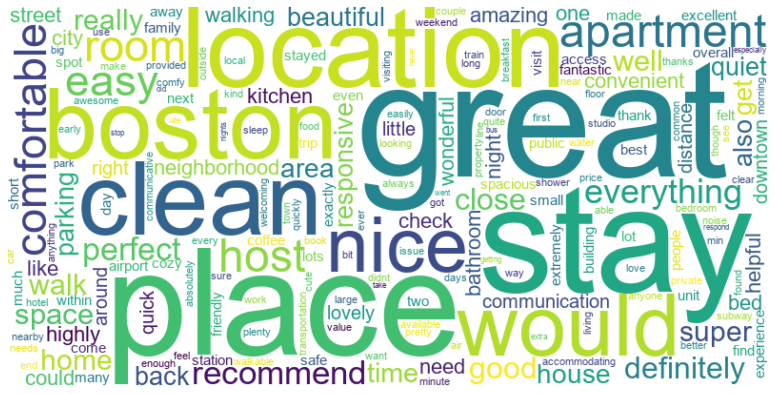

In [64]:
from wordcloud import WordCloud

font_path = r'C:\Windows\Fonts\arial.ttf'
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path)
wordcloud.generate_from_frequencies(vocab_freq)

# Display
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136382 entries, 14 to 182481
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   listing_id              136382 non-null  int64         
 1   review_date             136382 non-null  datetime64[ns]
 2   reviewer_id             136382 non-null  int64         
 3   comments                136382 non-null  object        
 4   neighbourhood_cleansed  136382 non-null  object        
 5   price                   136382 non-null  float64       
 6   latitude                136382 non-null  float64       
 7   longitude               136382 non-null  float64       
 8   room_type               136382 non-null  object        
 9   number_of_reviews       136382 non-null  int64         
 10  review_scores_rating    136382 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 12.5+ MB
